In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

print("done")

done


In [2]:
import import_func as imp
# import tags_work as tgs
# import desc_vis as vis
# import classifier_func as cls
import classifier_help as clh

def output_plot(outfile):
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig(outfile, dpi=100, bbox_inches='tight')

In [42]:
full_filename = "../data/by_article_fulltext_020920.jl"

full_df = imp.init_df(full_filename, "full", categories="all")

full_df = full_df.drop(
    [
        "date",
        "time",
        "date_seq",
        "column1",
        "column2",
        "one_time",
        "bio",
    ],
    axis=1,
)


print("done")

categories = [
    "advice",
    "job market",
    "academic",
    "postdoc",
    "graduate",
    "workplace diversity",
    "midcareer",
    "non-disciplinary",
    "life and career balance",
    "industry",
    "career profiles",
    "government",
    "undergraduate",
    "working life",
    "early career",
    "career-related policy"
        ]

formal_labels = {}
        
new_categories = []
for cat in categories:
    cat_new = cat.replace(" ", "_").replace("-", "_")
    cat = cat[0].upper() + cat[1:]
    formal_labels[cat_new] = cat
    new_categories.append(cat_new)
categories = new_categories

plots = ["modals","first","second","hedges","boosters"]

# print(categories)

done
['advice', 'job_market', 'academic', 'postdoc', 'graduate', 'workplace_diversity', 'midcareer', 'non_disciplinary', 'life_and_career_balance', 'industry', 'career_profiles', 'government', 'undergraduate', 'working_life', 'early_career', 'career_related_policy']


In [4]:
perm_first = pd.read_csv("../data/bargraph_data/first_sig_test.csv")
perm_second = pd.read_csv("../data/bargraph_data/second_sig_test.csv")
perm_modal = pd.read_csv("../data/bargraph_data/modal_sig_test.csv")
perm_hedges = pd.read_csv("../data/bargraph_data/hedges_sig_test.csv")
perm_boosters = pd.read_csv("../data/bargraph_data/boosters_sig_test.csv")

perm_first.head(3)

,Unnamed: 0,tags,pval,test_statistic,tag_median
0,1,academic,0.00006,-0.001174,0.000000
1,2,advice,0.00005,0.000838,0.002012
2,3,career_profiles,0.92068,0.000053,0.001227


In [5]:
# fig, axs = plt.subplots(3,2)
# fig.suptitle('Vertically stacked subplots')
# # fig.figure(figsize=(12, 8))
# fig.set_figheight(15)
# fig.set_figwidth(15)

# first_overall = []
# second_overall = []

# for cat in categories:
#     cat_df = full_df[full_df[cat] == "yes"]
#     # print(len(cat_df))
#     counts_df = clh.pronouns(cat_df)
#     # print(len(counts_df))

#     counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
#     counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

#     first = np.median(counts_df.frac1)
#     second = np.median(counts_df.frac2)

#     first_overall.append(first)
#     second_overall.append(second)

# overall = pd.DataFrame({"category":categories,"first":first_overall,"second":second_overall})

# #######

# counts_df = clh.pronouns(full_df)

# counts_df["frac1"] = counts_df["first"]/counts_df["wc"]
# counts_df["frac2"] = counts_df["second"]/counts_df["wc"]

# all_overall_first = np.median(counts_df["frac1"])
# all_overall_second = np.median(counts_df["frac2"])

# overall["first_comp"] = overall["first"]-all_overall_first
# overall["second_comp"] = overall["second"]-all_overall_second


# print(all_overall_first)
# print(all_overall_second)

# sns.barplot(y = "category", x = "first_comp",ax=axs[0,0], data = overall)
# sns.barplot(y = "category", x = "second_comp",ax=axs[0,1], data = overall)

In [33]:
def tag_med_process(full_df, categories, word_type):
    cat_medians = []

    for cat in categories:
        cat_df = full_df[full_df[cat] == "yes"]

        if word_type == "first" or word_type == "second":
            counts_df = clh.pronouns(cat_df)
            # if word_type == "first":
                # col_name = "first"
            # else:
                # col_name = "second"
        elif word_type == "modals":
            counts_df = clh.modals(cat_df)
            # col_name = "modals"
        elif word_type == "hedges" or word_type == "boosters":
            counts_df = clh.hedges(cat_df, hedges=word_type)
        else:
            print("not working")

        counts_df["frac"] = counts_df[word_type]/counts_df["wc"]

        cat_med = np.median(counts_df.frac)
        cat_medians.append(cat_med)

    overall = pd.DataFrame({"category":categories,"median":cat_medians})
    return(overall)

    #######

def overall_comparison(full_df, word_type):
    if word_type == "first" or word_type == "second":
        counts_df = clh.pronouns(full_df)
        # if word_type == "first":
            # col_name = "first"
        # else:
            # col_name = "second"
    elif word_type == "modals":
        counts_df = clh.modals(full_df)
        # col_name = "modals"
    elif word_type == "hedges" or word_type == "boosters":
        counts_df = clh.hedges(full_df, hedges=word_type)


    counts_df["frac"] = counts_df[word_type]/counts_df["wc"]

    all_overall_first = np.median(counts_df["frac"])
    return(all_overall_first)


def position(item):
    j=1
    if item =="modals":
        i=0
    elif item == "first" or item == "second":
        i=1
        if item == "first":
            j=0
    else:
        i=2
        if item == "boosters":
            j=0
    return(i,j)

modals


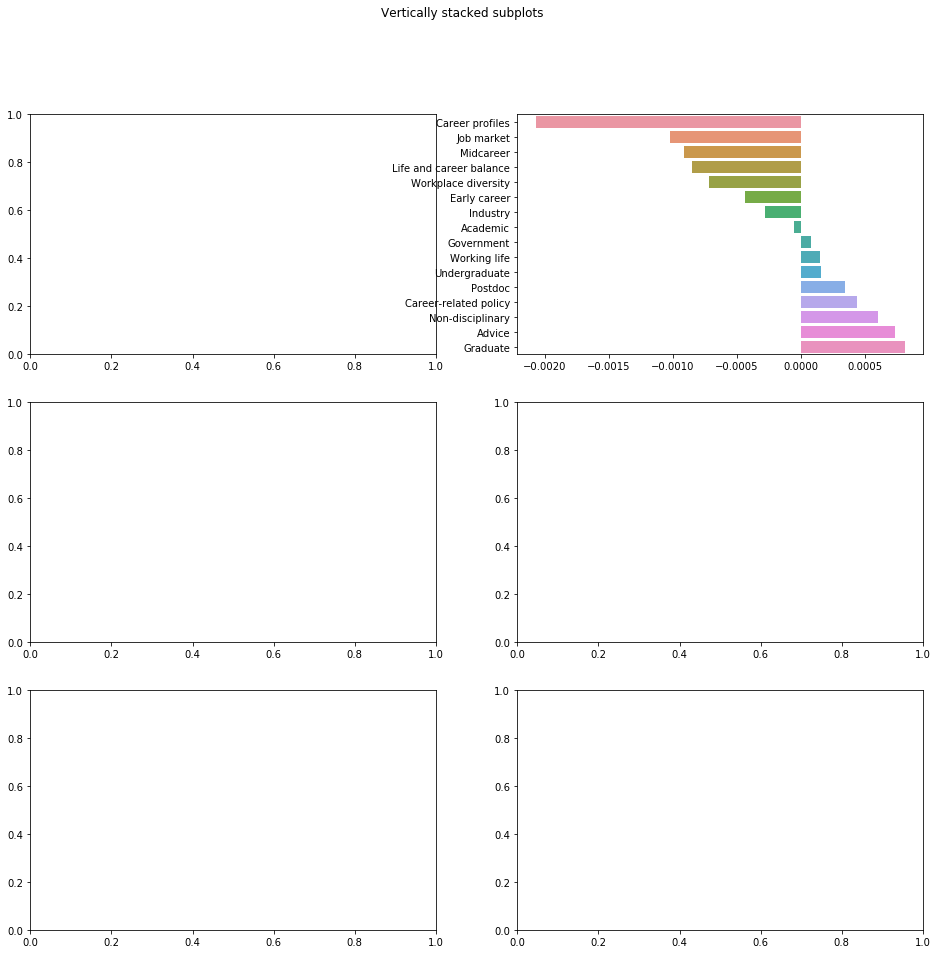

In [43]:
fig, axs = plt.subplots(3,2)
fig.suptitle('Vertically stacked subplots')
# fig.figure(figsize=(12, 8))
fig.set_figheight(15)
fig.set_figwidth(16)

i=0
j=1

# for item in plots:
for item in ["modals"]:
    print(item)
    i,j = position(item)
    overall = tag_med_process(full_df=full_df, categories=categories, word_type=item)
    baseline = overall_comparison(full_df=full_df, word_type=item)

    overall["dif"] = overall["median"]-baseline
    overall = overall.sort_values(by="dif")
    overall["category"] = [formal_labels[cat] for cat in overall["category"]]

    sns.barplot(y = "category", x = "dif",ax=axs[i,j], data = overall)

for ax in axs.flat:
    ax.set_ylabel('')    
    ax.set_xlabel('')
fig.
    


In [32]:
# # averages overall

# modal_overall = []

# for cat in categories:
#     cat_df = full_df[full_df[cat] == "yes"]
#     # print(len(cat_df))
#     counts_df = clh.modals(cat_df)
#     # print(counts_df.head(3))

#     counts_df["frac"] = counts_df["modals"]/counts_df["wc"]

#     modal = np.mean(counts_df.frac)

#     modal_overall.append(modal)

# overall = pd.DataFrame({"category":categories,"modal":modal_overall})
# # overall = overall.sort_values(by="modal")

# # sns.barplot(y = "category", x = "modal", data=overall)

# # overall

# counts_df = clh.modals(full_df)

# counts_df["frac"] = counts_df["modals"]/counts_df["wc"]

# all_overall_modal = np.mean(counts_df["frac"])

# overall["modal_comp"] = overall["modal"]-all_overall_modal

# overall = overall.sort_values(by="modal_comp")

# print(all_overall_modal)

# modal_plot = sns.barplot(y = "category", x = "modal_comp",color="blue", data = overall)
# # plt.title("difference of average proportion of each category from overall proportion")
# # output_plot("../figs/comparisons_words_categories/cat_prop_modal_barplot_mean.png")

0.003134796238244514
0.01557285873192436


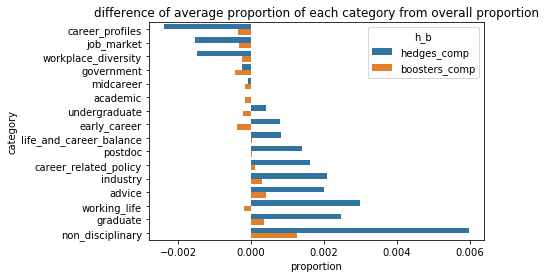

<Figure size 432x288 with 0 Axes>

In [13]:
# # averages overall

# hedges_overall = []
# boosters_overall = []

# for cat in categories:
#     cat_df = full_df[full_df[cat] == "yes"]
#     # print(len(cat_df))
#     counts_df_h = clh.hedges(cat_df, hedges="hedges")
#     counts_df_b = clh.hedges(cat_df, hedges="boosters")
#     # print(counts_df.head(3))

#     counts_df_h["frac_h"] = counts_df_h["hedges"]/counts_df_h["wc"]
#     counts_df_b["frac_b"] = counts_df_b["boosters"]/counts_df_b["wc"]

#     hedges = np.median(counts_df_h.frac_h)
#     boosters = np.median(counts_df_b.frac_b)

#     # print(first)
#     # print(second)

#     hedges_overall.append(hedges)
#     boosters_overall.append(boosters)


# overall = pd.DataFrame({"category":categories,"hedges":hedges_overall, "boosters":boosters_overall})
# # overall["tot"] = overall["hedges"]+overall["boosters"]
# # overall = overall.sort_values(by="tot")
# # overall = overall.drop(["tot"],axis=1)
# # overall_long = pd.melt(overall, ["category"],var_name="h_b",value_name="proportion" )

# # sns.barplot(y = "category", x = "proportion", hue = "h_b", data=overall_long)

# # overall

# counts_df_h = clh.hedges(full_df, hedges="hedges")
# counts_df_b = clh.hedges(full_df, hedges="boosters")

# counts_df_h["frac_h"] = counts_df_h["hedges"]/counts_df_h["wc"]
# counts_df_b["frac_b"] = counts_df_b["boosters"]/counts_df_b["wc"]

# all_overall_hedges = np.median(counts_df_h["frac_h"])
# all_overall_boosters = np.median(counts_df_b["frac_b"])

# overall["hedges_comp"] = overall["hedges"]-all_overall_hedges
# overall["boosters_comp"] = overall["boosters"]-all_overall_boosters

# overall["tot"] = overall["hedges_comp"]+overall["boosters_comp"]
# overall = overall.sort_values(by="tot")

# overall = overall.drop(
#     [
#         "hedges",
#         "boosters",
#         "tot"
#     ],
#     axis=1,
# )

# overall_long = pd.melt(overall, ["category"],var_name="h_b",value_name="proportion" )

# print(all_overall_boosters)
# print(all_overall_hedges)

# hedges_plot = sns.barplot(y = "category", x = "proportion", hue = "h_b", data = overall_long)
# plt.title("difference of average proportion of each category from overall proportion")
# output_plot("../figs/comparisons_words_categories/cat_prop__hedges_barplot_median.png")